# Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset file

In [2]:
df=pd.read_csv("netflix_datasets.csv")
df.head()   # bydefault showing data of starting five rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.shape  # shows no of total rows and columns of datasets

(7787, 12)

# Data cleaning and processing

In [4]:
df.describe()  # shows basic statics of integer and float type columns

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
df.info() # shows the datatypes and count of non_null values of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


form above we find out that we need to change data_type of data_added column

In [6]:
# to updata data_type of date_added column
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
df.isna().sum()  # to check the total null values in each columns

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        98
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Handling missing values

Director, cast, country, rating filled with "unavailable" as all thes mentioned columns have data_type string so we replace null values by string("Unavailable")

In [10]:
df.fillna({'director':'Unavailable','country':'Unavailable','cast':'Unavailable','rating':'Unavailable'},inplace=True)

In [11]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

For date_added column, its data_type is datatime so we replace its null value by most recent date of its column

In [12]:
df[df.date_added.isnull()]   # to check the rows where vlues are null in this perticular column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
284,s285,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
556,s557,TV Show,忍者ハットリくん,Unavailable,Unavailable,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
690,s691,TV Show,Bad Education,Unavailable,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6950,s6951,TV Show,The Tudors,Unavailable,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
6996,s6997,TV Show,The West Wing,Unavailable,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
7446,s7447,TV Show,Vroomiz,Unavailable,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
7522,s7523,TV Show,Weird Wonders of the World,Unavailable,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


In [13]:
most_recent_entry_date=df['date_added'].max()    # to get most recent date from this column
df.fillna({'date_added':most_recent_entry_date},inplace=True)  # filling null value by this recent date

In [14]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now our all data is cleaned ,so we need to create visualization for this dataset

# Visualizations and Insights

In [15]:
df.type.value_counts()  # value_counts, show the counts of different categories in a given column

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

Text(0.5, 1.0, 'count vs type of shows')

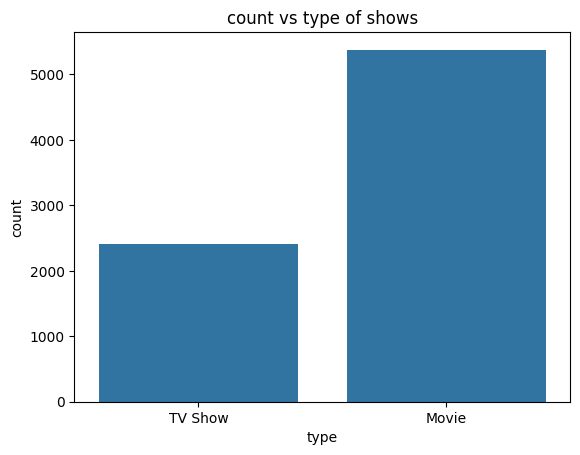

In [16]:
sns.countplot(x='type',data=df)
plt.title("count vs type of shows")

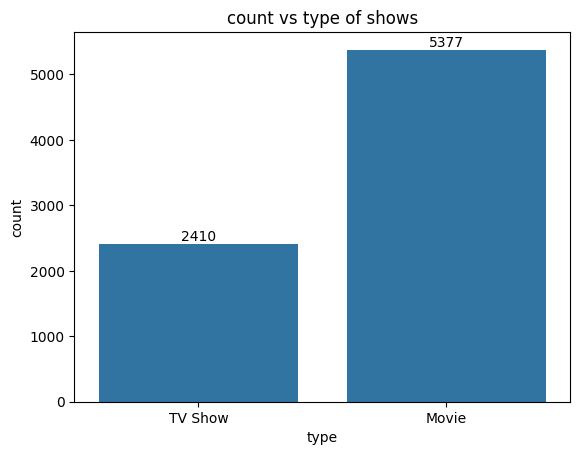

In [17]:
# to adding the data values
ax=sns.countplot(x='type',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("count vs type of shows")    
plt.show()

On Netflix,there are more no of Movies as campared to Tv shows, greater than two time of Tv shows

In [18]:
df["country"].value_counts().sort_values(ascending=False).head(10)  # top 10 countries by Netflix content 

country
United States     2555
India              923
Unavailable        507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64

Text(0.5, 1.0, 'country wise content on netflix')

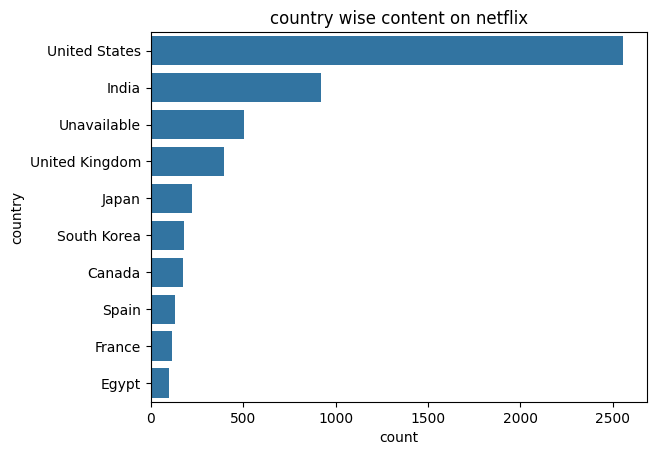

In [19]:
sns.countplot(y='country', order=df["country"].value_counts().index[0:10],data=df)
plt.title("country wise content on netflix")

Text(0.5, 1.0, 'country wise content on netflix')

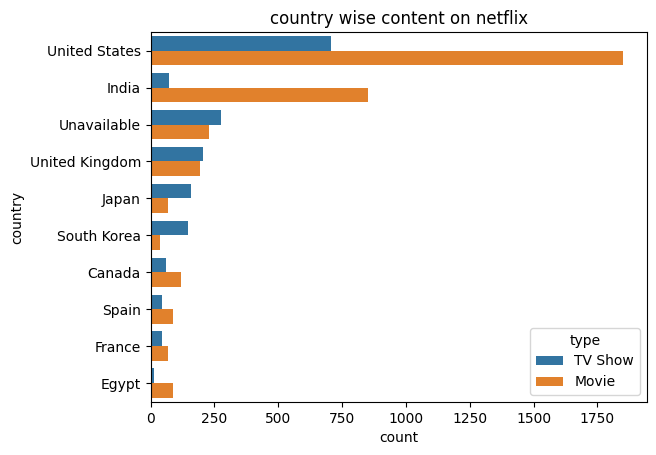

In [20]:
sns.countplot(y='country', order=df["country"].value_counts().index[0:10],data=df,hue='type')
plt.title("country wise content on netflix")

From above two plot, we conclude that United states has highest content on Netflix in both types(Tv shows as well as Movies)

In [21]:
df.rating.value_counts()

rating
TV-MA          2863
TV-14          1931
TV-PG           806
R               665
PG-13           386
TV-Y            280
TV-Y7           271
PG              247
TV-G            194
NR               84
G                39
Unavailable       7
TV-Y7-FV          6
UR                5
NC-17             3
Name: count, dtype: int64

Text(0.5, 1.0, 'Rating of shows on netflix vs count')

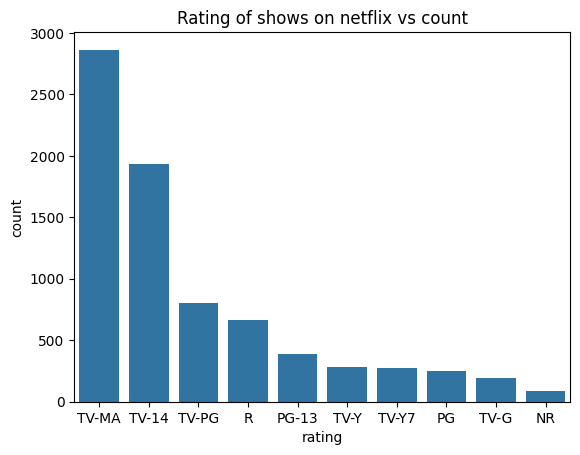

In [22]:
sns.countplot(x='rating',order=df.rating.value_counts().index[0:10],data=df)
plt.title('Rating of shows on netflix vs count')

TV-MA and TV-14 has most rating on Netflix

In [23]:
df.release_year.value_counts()[:15]

release_year
2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
2011     166
2009     137
2008     125
2007      85
2006      85
Name: count, dtype: int64

Text(0.5, 1.0, 'relese_year vs count of netflix content')

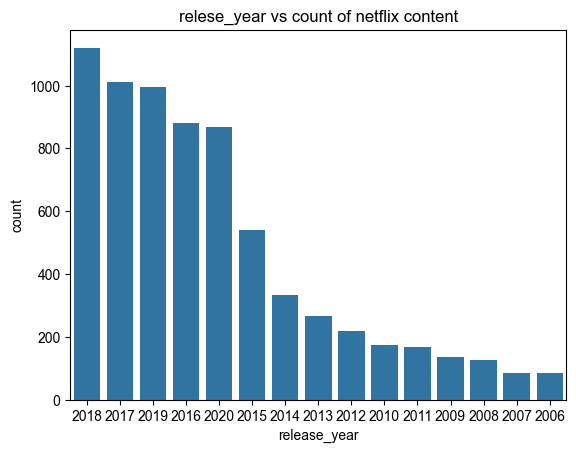

In [24]:
sns.countplot(x='release_year',order=df.release_year.value_counts().index[0:15],data=df)
sns.set(rc={'figure.figsize':(20,6)})
plt.title("relese_year vs count of netflix content")

In 2018, Netflix had released highest content

In [25]:
df['listed_in'].value_counts()[0:10]

listed_in
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64

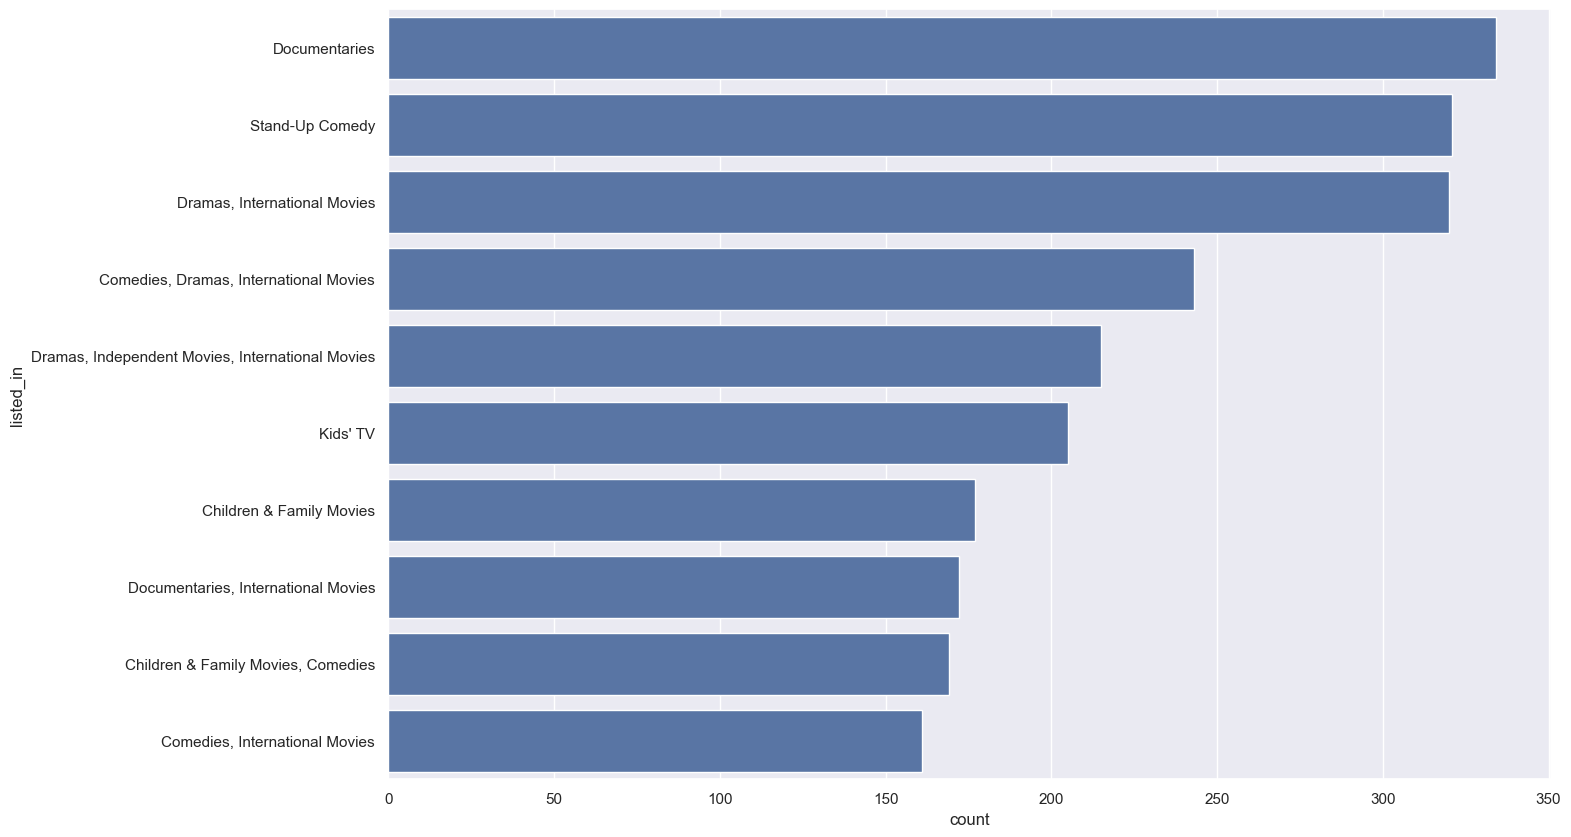

In [27]:
# to plot graph based on count of "listed_in" column in netflix
sns.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:10],data=df)
sns.set(rc={'figure.figsize':(15,10)})
plt.title=('top 10 listed_in on Netflix')

Top three most popular listed_in in netflix are Documentaries,stand-up Comedy and Dramas international Movies respectively